## Data Dictionary

|Index||Name of Column|Definition|
|----||---|----|
|1||Gender|Gender of the passengers (Female, Male)|
|2||Customer Type|The customer type (Loyal customer, disloyal customer)|
|3||Age|The actual age of the passengers|
|4||Type of Travel|Purpose of the flight of the passengers (Personal Travel, Business Travel)|
|5||Class| Travel class in the plane of the passengers (Business, Eco, Eco Plus)|
|6||Flight distance| The flight distance of this journey|
|7||Inflight wifi service| Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)|
|8||Departure/Arrival time convenient|Satisfaction level of Departure/Arrival time convenient|
|9||Ease of Online booking| Satisfaction level of online booking|
|10||Gate location| Satisfaction level of Gate location|
|11||Food and drink| Satisfaction level of Food and drink|
|12||Online boarding|Satisfaction level of online boarding|
|13||Seat comfort| Satisfaction level of Seat comfort|
|14||Inflight entertainment: Satisfaction level of inflight entertainment|
|15||On-board service| Satisfaction level of On-board service|
|16||Leg room service| Satisfaction level of Leg room service|
|17||Baggage handling| Satisfaction level of baggage handling|
|18||Check-in service| Satisfaction level of Check-in service|
|19||Inflight service| Satisfaction level of inflight service|
|20||Cleanliness| Satisfaction level of Cleanliness|
|21||Departure Delay in Minutes| Minutes delayed when departure|
|22||Arrival Delay in Minutes| Minutes delayed when Arrival|
|23||Satisfaction| Airline satisfaction level(Satisfaction, neutral or dissatisfaction)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip install xlrd

#df = pd.read_excel('../Project2a/satisfaction.xlsx')

In [3]:
#convert excel to csv
#data_xls = pd.read_excel('../Project2a/satisfaction.xlsx', 'satisfaction_v2', dtype=str, index_col=None)
#data_xls.to_csv('satisfaction.csv', encoding='utf-8', index=False)

In [4]:
df = pd.read_csv('../Project 2/satisfaction.csv')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


#### check data and cleaning

In [5]:
#check for null value
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df.shape #check shape

(129880, 24)

In [7]:
df = df.dropna(how='any',axis=0) #drop all the rows with null values as the percentage is about 0.03%

In [8]:
df.isnull().sum() #check for null value again

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [9]:
df.shape #check shape again

(129487, 24)

In [10]:
df.rename(columns={'satisfaction_v2': 'satisfaction'}, inplace=True) #rename 

In [11]:
df.dtypes

id                                     int64
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure 

##### Target - Satisfaction

In [12]:
df["satisfaction"].unique() #2 category

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [13]:
#encoding of values
df["satisfaction"].replace({"satisfied" : 1, "neutral or dissatisfied": 0}, inplace = True)

##### Catergorical 

In [14]:
df["Customer Type"].unique() #2 category

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [15]:
df["Gender"].unique() #2 category

array(['Female', 'Male'], dtype=object)

In [16]:
df["Type of Travel"].unique() #2 category

array(['Personal Travel', 'Business travel'], dtype=object)

In [17]:
df["Class"].unique() #3 category

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [18]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float') #convert the dtype
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes'] #create new column to combine the delay 
df = df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [19]:
df = df.drop(['id'],axis=1)

In [20]:
df['satisfaction'].value_counts(normalize=True) #contain the relative frequencies of the unique values

1    0.547406
0    0.452594
Name: satisfaction, dtype: float64

In [21]:
df.shape

(129487, 22)

In [22]:
df.dtypes

satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Total Delay                          float64
dtype: obj

In [23]:
#drop those columns that are not helpful in analysis
df_drop = df.drop(["Age", "Flight Distance", "Customer Type", "Gender", "Type of Travel", "Class", "Total Delay"], axis=1)

In [24]:
df_drop

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,1,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,1,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,1,0,0,0,3,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,5,5,5,3,2,5,2,2,3,3,4,4,4,2
129876,0,2,3,2,4,2,1,1,3,2,3,3,1,2,1
129877,0,3,0,3,3,3,2,2,4,4,3,4,2,3,2
129878,0,3,2,3,2,3,2,2,3,3,2,3,2,1,2


#### EDA

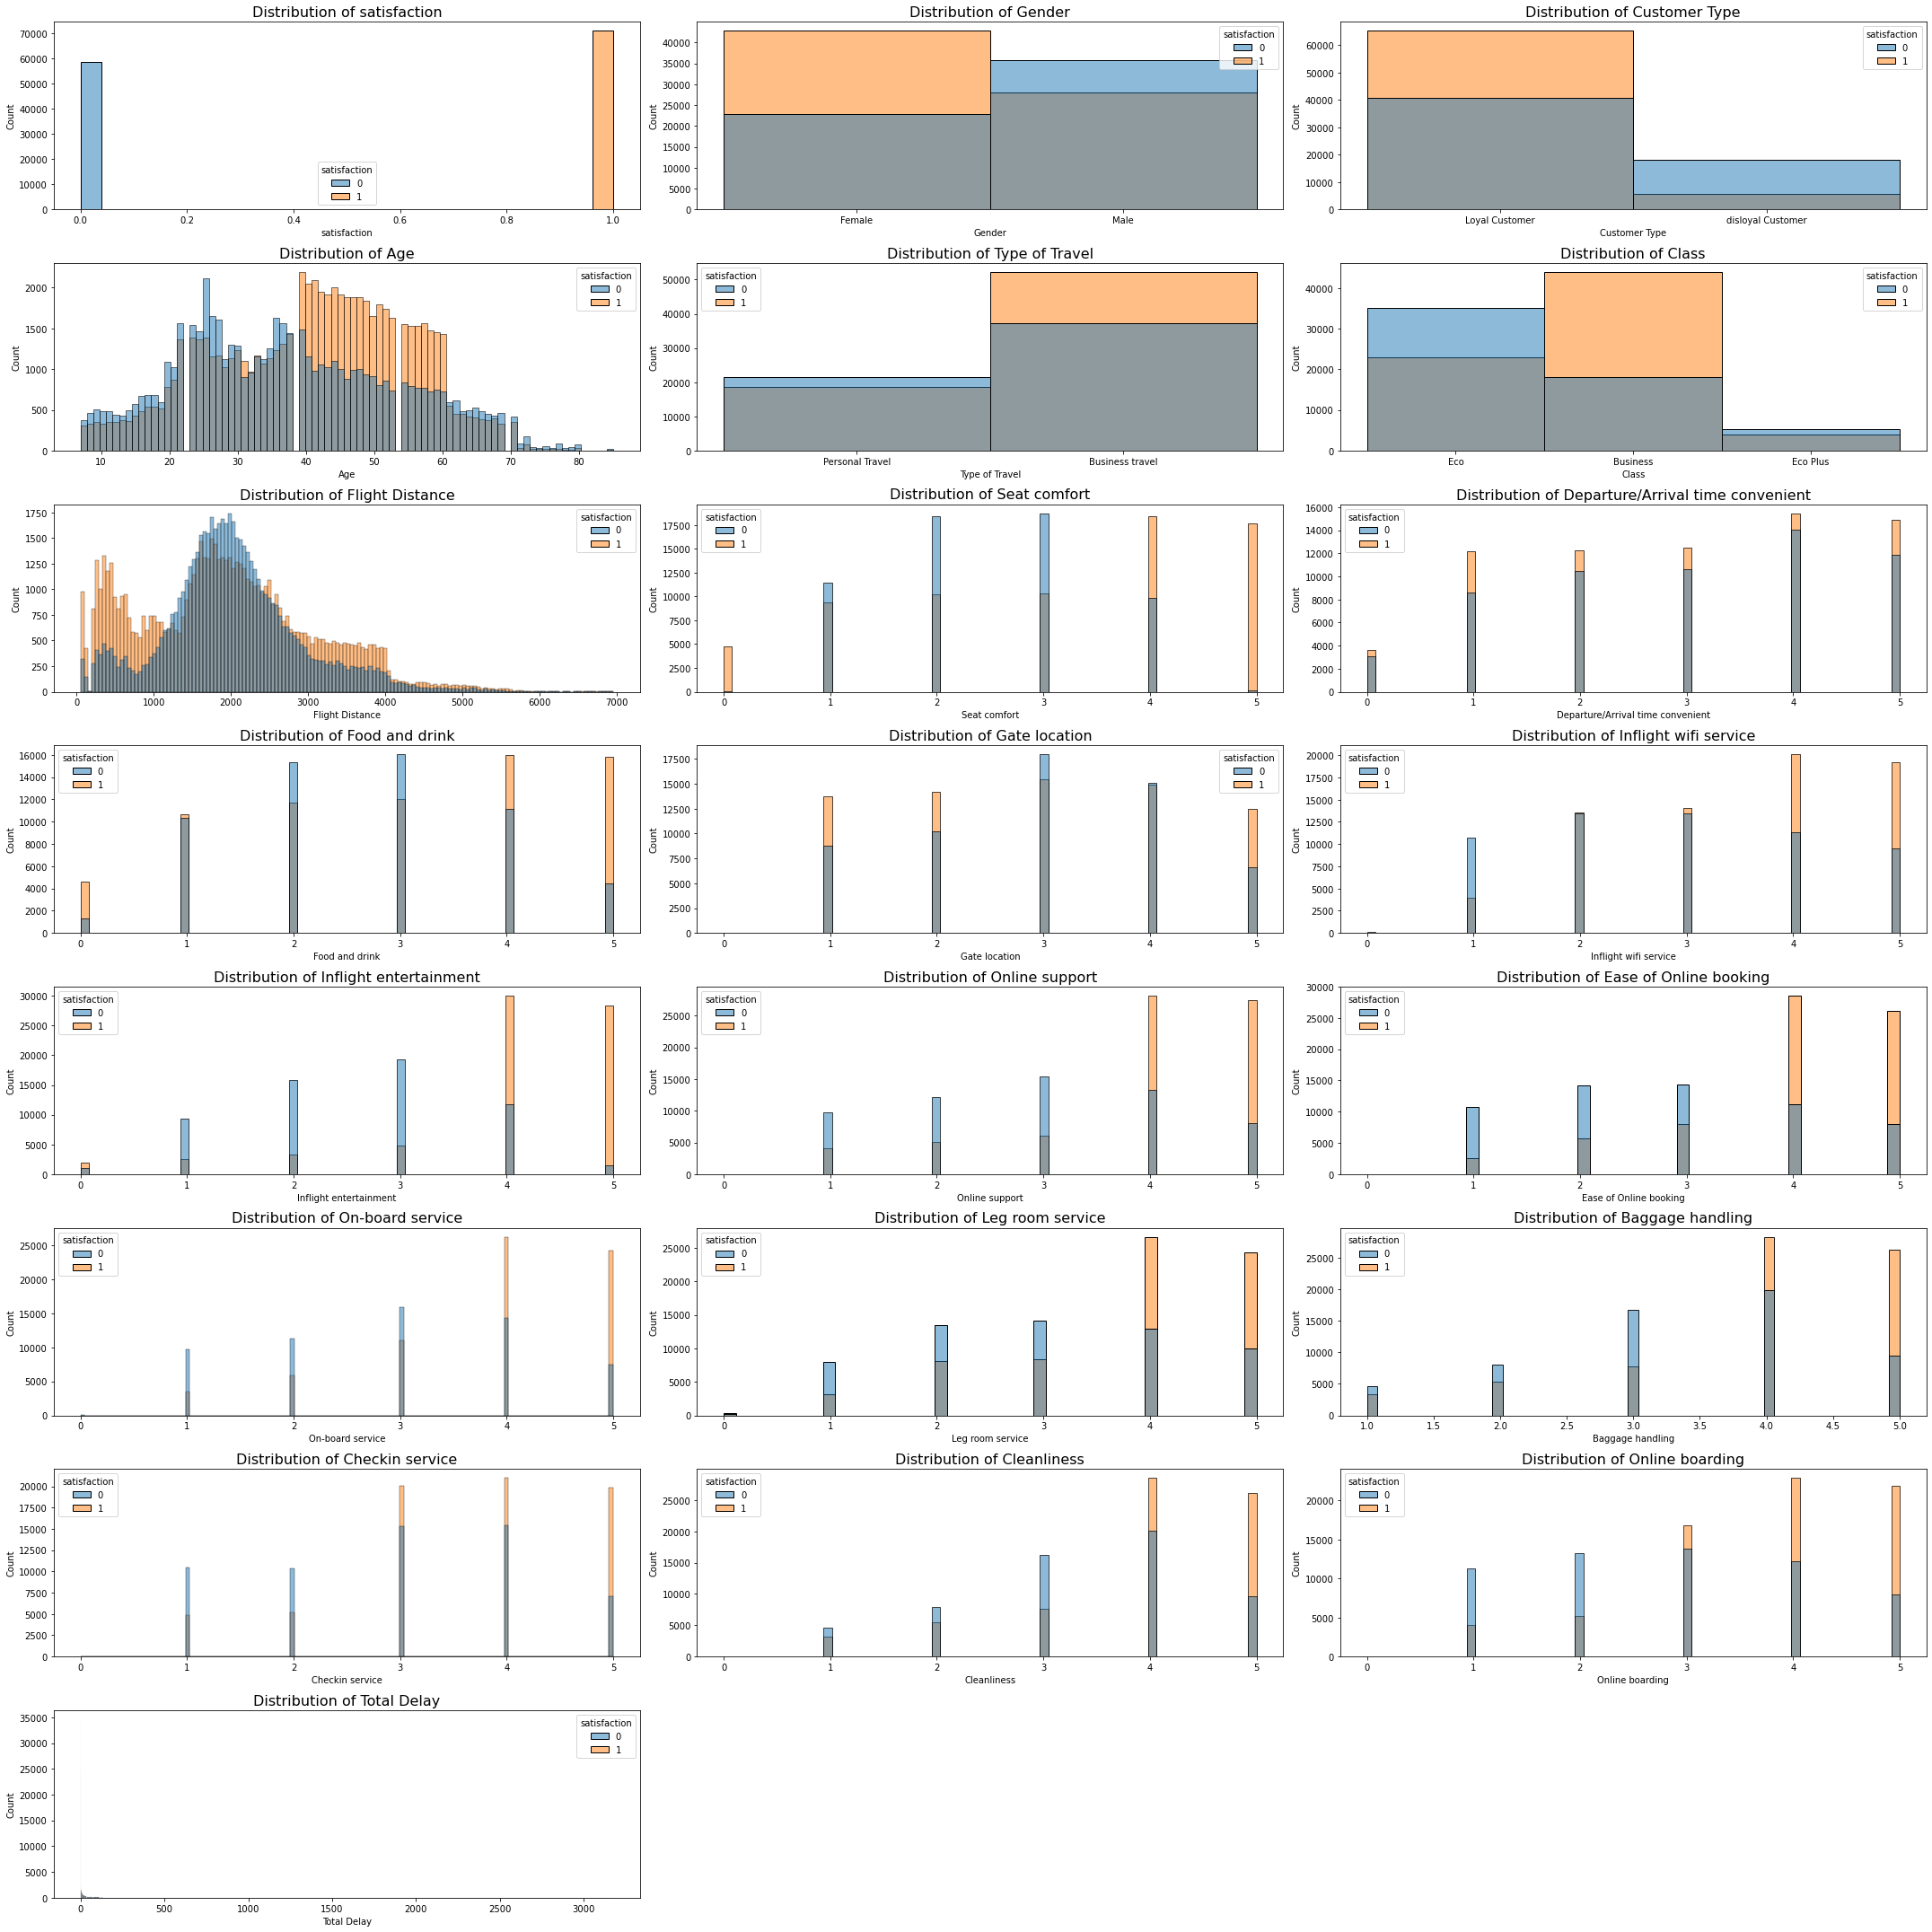

In [25]:
#plot histogram for any outliners
plt.figure(figsize = (30,30))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in df:
    plt.subplot(8,3,num)
    sns.histplot(data=df, x=cols, hue= 'satisfaction')
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();

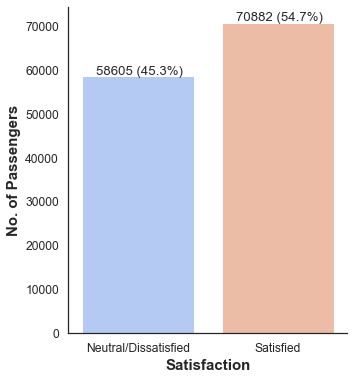

In [26]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine() #removes the spines from the right and upper portion of the plot by default
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

<AxesSubplot:>

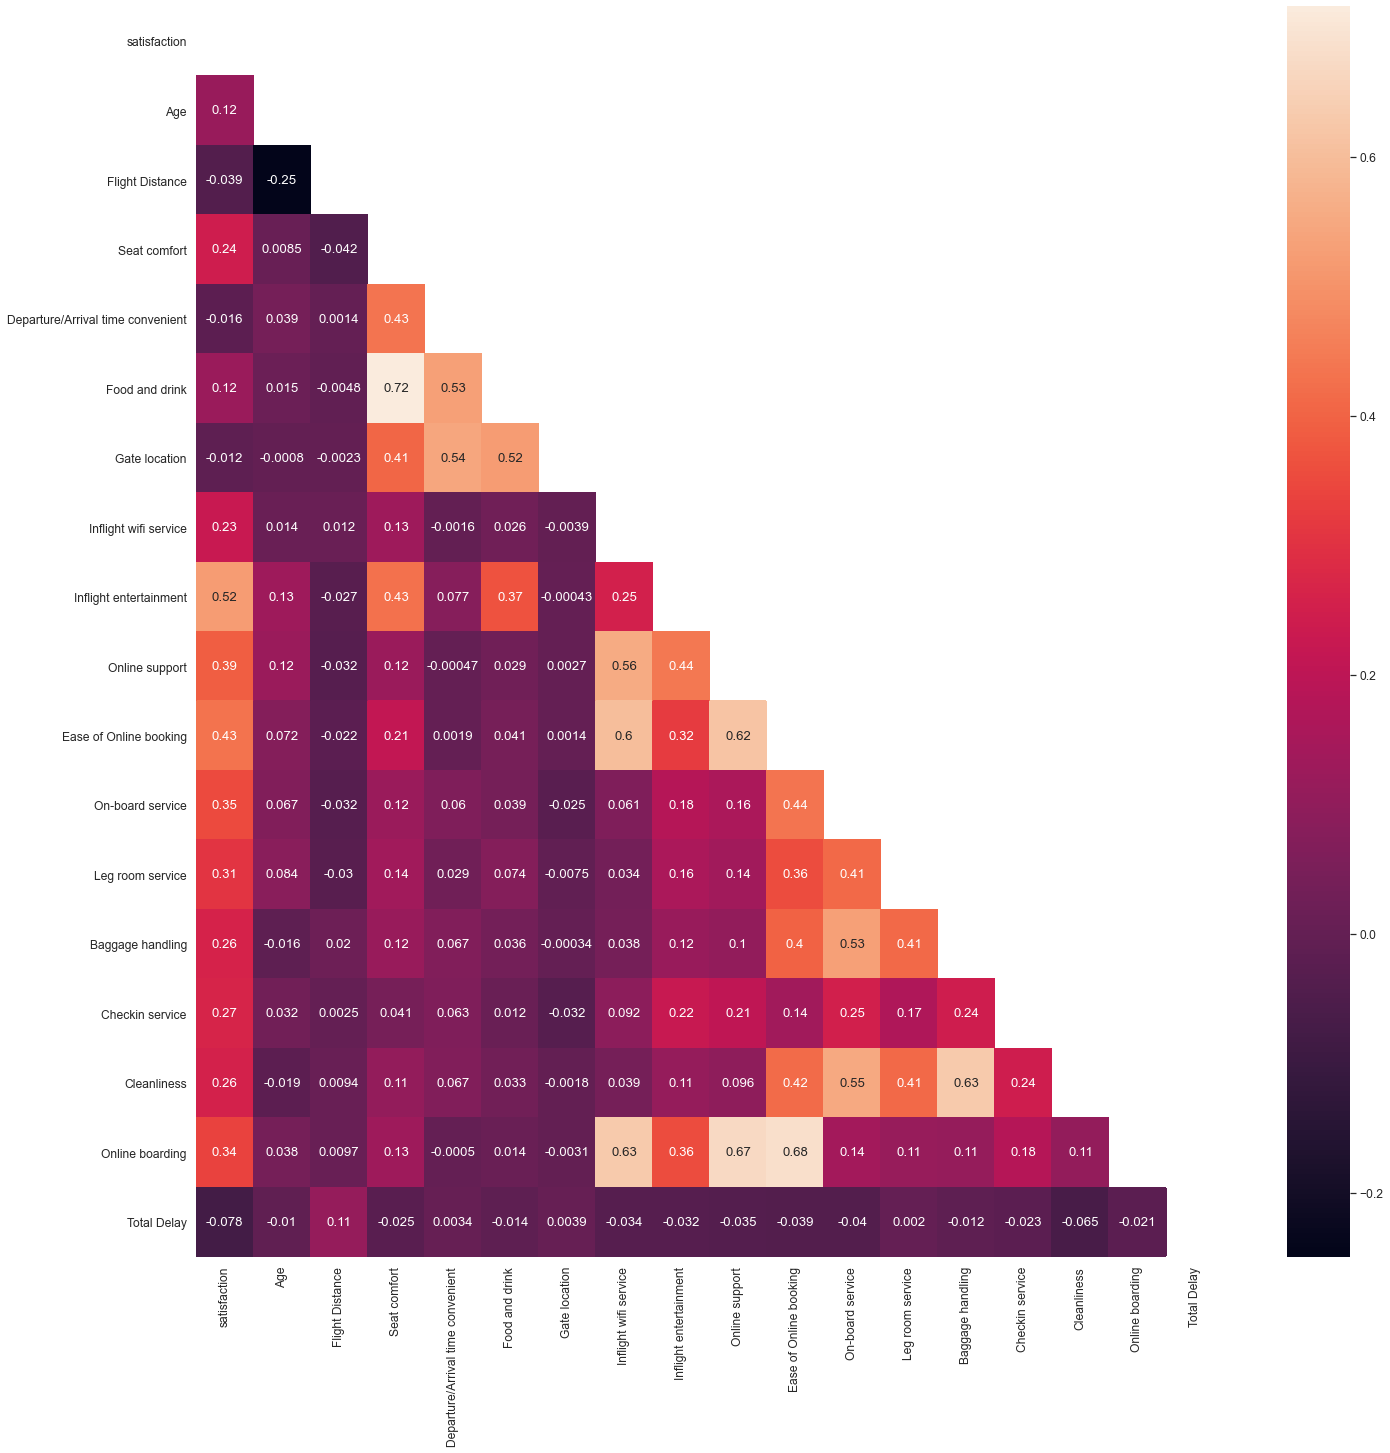

In [27]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

plt.figure(figsize =(23,23))
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [28]:
#correlation
df.corr()["satisfaction"].sort_values(ascending=False)

satisfaction                         1.000000
Inflight entertainment               0.523364
Ease of Online booking               0.432017
Online support                       0.389890
On-board service                     0.352283
Online boarding                      0.338118
Leg room service                     0.305115
Checkin service                      0.266089
Baggage handling                     0.260398
Cleanliness                          0.259504
Seat comfort                         0.242371
Inflight wifi service                0.227010
Food and drink                       0.120568
Age                                  0.117913
Gate location                       -0.012272
Departure/Arrival time convenient   -0.015624
Flight Distance                     -0.039133
Total Delay                         -0.078029
Name: satisfaction, dtype: float64

#### Modelling

#### Confusion Matrix

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [30]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
svc_model = SVC(probability=True)
nb = GaussianNB()

In [31]:
def train_and_score_model(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    model_name = model.__class__.__name__
    
    print(f"Training for model: {model_name}\n\n")
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test) * 100
    
    print(f"Score for {model_name}:\n{score}")
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy: {score:.2f}%')
    

Training for model: LogisticRegression


Score for LogisticRegression:
80.54289906556491
Training for model: SVC


Score for SVC:
92.87589775272221
Training for model: GaussianNB


Score for GaussianNB:
78.8555100779983


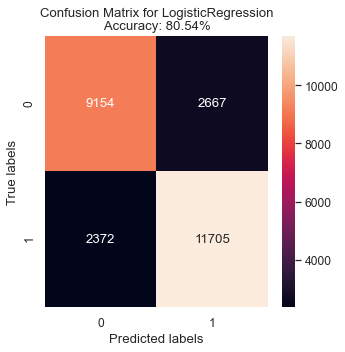

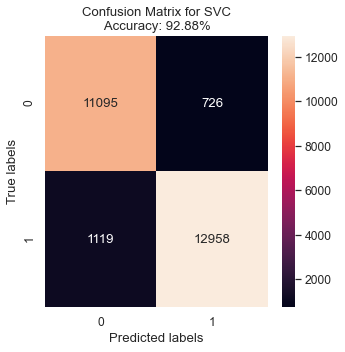

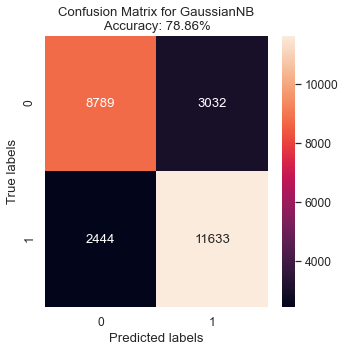

In [33]:
models =[LogisticRegression(max_iter=1000), SVC(), nb]
target_col = "satisfaction"
X = df_drop[[col for col in df_drop.columns if col != target_col]]
y = df_drop[target_col]

for m in models:
    train_and_score_model(m,X, y)

#### ROC Curve

In [ ]:
from sklearn import metrics

def fit_roc_curve(model, X, y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
   
    model_name = model.__class__.__name__
    
    print(f"Training for model: {model_name}\n\n")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    
    roc_auc = metrics.auc(fpr,tpr)
    
    plt.figure(figsize=[8,8])
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = '{model_name} ROC curve (area = %0.2f)' % roc_auc)
    
    plt.show()

In [ ]:
models =[LogisticRegression(max_iter=1000), SVC(), nb]
target_col = "satisfaction"
X = df_drop[[col for col in df_drop.columns if col != target_col]]
y = df_drop[target_col]

for m in models:
    fit_roc_curve(m, X, y)


#### Best Parameters

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [37]:
model = LogisticRegression()

print("Default Parameters ")
print('='*50)

print(model.get_params())

print('='*50)


Default Parameters 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [38]:
target_col = "satisfaction"
X = df_drop[[col for col in df_drop.columns if col != target_col]]
y = df_drop[target_col]

In [39]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [41]:
lr_search = GridSearchCV(estimator=model, param_grid=lr_params, cv=3, verbose=1)

In [50]:
lr_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hweeli/opt

/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80643699        nan 0.80644664        nan 0.80641768]
  warnings.warn(


{'C': 10, 'penalty': 'l2'}

In [43]:
lr_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [47]:
#Function that will evaluate the working of our Classifier on test set
def evaluate(model, X, y):
    
    print(model.get_params())
    print('=='*50)
    predictions = model.predict(X)
    report = classification_report(y, predictions)
    
    score = accuracy_score(y_true= y, y_pred= predictions)
    
    print(report)
    print('=='*50)
    print("{} {:0.2f}%".format("Accuracy Score :: ", score*100))

In [48]:
evaluate(lr_search.best_estimator_, X_test, y_test)

{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     11821
           1       0.81      0.83      0.82     14077

    accuracy                           0.81     25898
   macro avg       0.80      0.80      0.80     25898
weighted avg       0.81      0.81      0.81     25898

Accuracy Score ::  80.54%


In [51]:
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     11821
           1       0.81      0.83      0.82     14077

    accuracy                           0.81     25898
   macro avg       0.80      0.80      0.80     25898
weighted avg       0.81      0.81      0.81     25898

Accuracy Score ::  80.54%


In [52]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [ ]:
svc_search = GridSearchCV(SVC(), svc_params, verbose=3)
svc_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ................C=1, gamma=0.001, kernel=linear; total time=10.9min


In [ ]:
svc_search.best_params_

In [ ]:
grid_predictions = svc_search.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))